In [18]:
import time
lista = [2,7,11,15,26,27,29,33,50,100,150,170,200]
target = 370

def sumados(lista, target):
    for i in range(len(lista)):
        #print(f'Analizando el elemento {lista[i]}')
        for j in range(i+1,len(lista)):
            #print(f'Analizando el elemento {lista[i]} con el elemento {lista[j]}')
            suma = lista[i]+lista[j]
            if(suma == target):
                return [i,j]
            
#inicio = time.perf_counter()       
indices = sumados(lista,target)
#fin = time.perf_counter() 
#print(f'El tiempo de ejecucion fue de {fin-inicio:0.6f} segundos')
print(f'Los valores que suman {target} son {lista[indices[0]]} + {lista[indices[1]]} y los indices son {indices[0]}, {indices[1]}')
%timeit -r 7 -n 1000 sumados(lista,target)

Los valores que suman 370 son 170 + 200 y los indices son 11, 12
25.4 µs ± 5.07 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
# algoritmo con un dictionario y un solo for
import time
def twoSum2(lista,target):
    for i, num in enumerate(lista):
        ntarget = target - num
        if ntarget in lista and lista.index(ntarget) > i:
            return [i, lista.index(ntarget)]
    return []
#inicio = time.perf_counter() 
twoSum2(lista,target)
#fin = time.perf_counter()
#print(f'El tiempo de ejecucion fue de {fin-inicio:0.6f} segundos')

%timeit -r 7 -n 1000 twoSum2(lista,target)

[11, 12]
7.7 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Numpy

Es una libreria numeria de Python que permite el procesado rapido de data.
Numpy tiene una estructura de datos (arreglos) propia que son mas eficientes para  almacenar la data. Mas eficiente que las listas.

A parte tiene funciones numpy-financial, financieras de calculo de valor presente, TIR, periodos, etc.

Es la base de Pandas

## Arreglos y Vectores

In [25]:
import numpy as np

flujos =[-200,100,200,50,30,200] # lista de python
np_flujos = np.array(flujos) # convertir la lista en un numpy array-arreglo-matriz

print(np_flujos)
print(flujos)
type(np_flujos)

np.npv(0.08,np_flujos) #valor presente de los flujos a la tasa de 8%

[-200  100  200   50   30  200]
[-200, 100, 200, 50, 30, 200]


<ipython-input-25-6e92cb1525de>:10: DeprecationWarning: numpy.npv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.npv instead (https://pypi.org/project/numpy-financial/).
  np.npv(0.08,np_flujos)


261.9195036946019

In [31]:
lista = [100,20.5, 30,True,'AAPL'] # listas de Python pueden tener cualquier tipo de dato
np_lista = np.array(lista)
np_lista #transforma todo al mismo tipo de dato

array(['100', '20.5', '30', 'True', 'AAPL'], dtype='<U32')

## Indexado y Slicing

In [41]:
np_flujos = np.array([-200,100,200,50,30,200])
print(np_flujos[0])
print(np_flujos[2])
print(np_flujos[-1])
print(np_flujos[2:4]) #cortar/tomar un pedazo del arreglo
print(np_flujos[:5])
print(np_flujos[::-1]) #invertir el orden
print(np_flujos[::2])
#nada de esto esta modificando el arreglo original
print(np_flujos)

-200
200
200
[200  50]
[-200  100  200   50   30]
[ 200   30   50  200  100 -200]
[-200  200   30]
[-200  100  200   50   30  200]


## Operaciones vectorizadas con Arreglos

In [44]:
cf = np.array([50,100,120,150,30,250])
flujos =[-200,100,200,50,30,200] 

In [48]:
# Operacion con numpy array
print(cf-20) # le resta 20 a cada elemento del arreglo

#operacion con lista de python
cf_new=[]
for i,flujo in enumerate(cf):
    cf_new.append(flujo-20) #agregar un elemento al final de la lista
print(cf_new)

[ 30  80 100 130  10 230]
[30, 80, 100, 130, 10, 230]


In [49]:
# Multiplicar todo el arreglo por un valor
print(cf*1.1)

[ 55. 110. 132. 165.  33. 275.]


In [67]:
# Calculo de valor presente neto

cf= np.array([-200,20,50,70,120,30]) # arreglos con los cashflows - flujos efect.
r =0.08 # 8% tasa de descuento
n =np.array([0,1,2,3,4,5]) # arreglo de los periodos

vp = cf/((1+r)**n) #arreglo que va a contener los valores presente de cada flujo al periodo espec. por n
print(vp)

vpn =sum(vp)
print(vp.sum())
print(vpn)

[-200.           18.51851852   42.86694102   55.56825687   88.20358234
   20.41749591]
25.57479465160656
25.57479465160656


In [59]:
#suma de dos arreglos
cf2 = np.array([10,20,-10,30,10,-5])
print(cf)
print(cf2)
print(cf + cf2) #suma los elementos del arreglo

#print([1,2,3,4]+[5,6,7,8,9]) # recordatorio que listas no hay suma

[-200   20   50   70  120   30]
[ 10  20 -10  30  10  -5]
[-190   40   40  100  130   25]


## Cambiar valores (igual que en las lista)

In [74]:
cf= np.array([-200,20,50,70,120,30])

cf[0] = -300
print(cf)

#cambiar los elementos todos a un mismo valor
cf[1:]=40
print(cf)

#cambiar los elementos todos a un mismo valor
cf = cf+20 # sumar 20 a todos los elementos
cf +=20 #forma corta de hacer lo mismo
print(cf)

# PRECAUCION AL COPIAR ARREGLOS:
cf1 = np.array([100,20,50,70])
cf2 = cf1
cf1[0] = -200
print(cf1)
print(cf2)


#para copiarlos realmente y que queden separados
cf2 = cf1.copy()
cf1[0]= 95
print(cf1)
print(cf2)

[-300   20   50   70  120   30]
[-300   40   40   40   40   40]
[-260   80   80   80   80   80]
[-200   20   50   70]
[-200   20   50   70]
[95 20 50 70]
[-200   20   50   70]


## Problemas portenciales al hacer slicing

In [77]:
cf = np.array([100,10,20,50,30,25]) # ventas de una empresa

ultimos_3 = cf[-3:] # queremos los datos de los ultimos 3 periodos
ultimos_3


array([50, 30, 25])

In [79]:
ultimos_3[0]=60 #queremos cambiar el primer valor para hacer una analisis de escenarios
ultimos_3

array([60, 30, 25])

In [80]:
cf

array([100,  10,  20,  60,  30,  25])

In [81]:
ultimos_4 = cf[-4:]
ultimos_4

array([20, 60, 30, 25])

In [82]:
## SOLUCION
cf = np.array([100,10,20,50,30,25])
ultimos_3=cf[-3:].copy() # de esta forma ultimos_3 se vuelve independiente del arreglo originario.
ultimos_3

array([50, 30, 25])

In [85]:
ultimos_3[0]=100
ultimos_3
print(ultimos_3)
print(cf)

[100  30  25]
[100  10  20  50  30  25]


## Metodos y atributos de arreglos numpy

In [86]:
import numpy as np
cf = np.array([-200,20,50,70,100,50])

In [87]:
#Maximo 
max(cf) ## retorna el elemento mas alto de las lista
cf.max() ## lo mismo pero de numpy

100

In [88]:
cf.min()

-200

In [89]:
cf.argmax() #les retornar el indice del elemento mas alto del arreglo

4

In [90]:
cf.argmin()

0

In [91]:
cf.sum() # suma todos los elementos del arreglo

90

In [92]:
cf.cumsum() # devuelve un arreglo donde cada elemento, es la suma acumulada 
#de los elementos previos a este.

array([-200, -180, -130,  -60,   40,   90], dtype=int32)

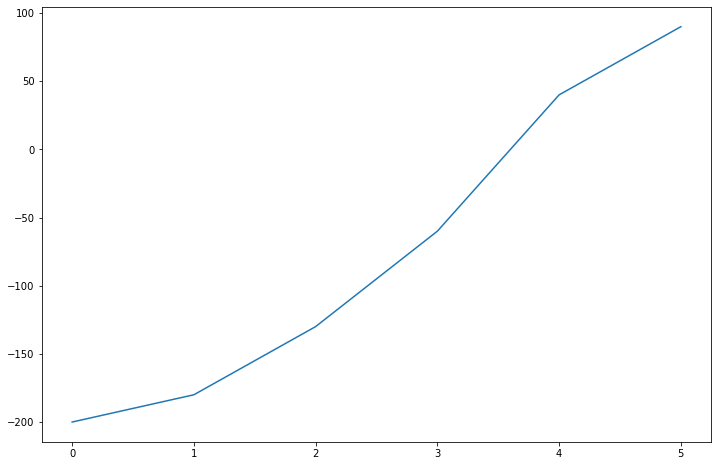

In [94]:
flujos_netos = cf.cumsum()
import matplotlib.pyplot as plt
#graficar los flujos acumulados
plt.figure(figsize = (12,8)) # tamano del cuadro en pulgadas alto x ancho
plt.plot(flujos_netos)
plt.show()

In [97]:
#ordernar de menor a mayor
cf.sort() # IMPORTANTE: en este caso si modifica el arreglo original
print(cf)

[-200   20   50   50   70  100]


In [111]:
#Redondear
#print(cf)
cf = cf+ 0.0125 
print(cf)
cf.round(1) # dentro del metodo/funcion round se pasa la cantidad de decimales

[-199.8375   20.1625   50.1625   50.1625   70.1625  100.1625]


array([-199.8,   20.2,   50.2,   50.2,   70.2,  100.2])

In [113]:
#El tamano
cf.size

6

In [116]:
import numpy as np
cf = [100,10,20,50,30,25]

#raiz cuadrada
np.sqrt(cf)

#exponenciar
np.power(cf,3)

#valor absoluto
cf = [-100,-10,20,50,30,25]
np.abs(cf)

array([100,  10,  20,  50,  30,  25])

## Arreglos boolean y Filtrado condicional


In [117]:
import numpy as np
cf = np.array([-200.6,20.53,50,70.87,100,50])

In [118]:
cf<0 # va elemento por elemento del arreglo cf y evalua si es menor que cero.

array([ True, False, False, False, False, False])

In [119]:
negativos = cf<0
print(negativos)

[ True False False False False False]


In [120]:
cf[negativos]

array([-200.6])

In [121]:
cf[cf<0] #esta es la manera corta de hacerlo

array([-200.6])

In [122]:
pos = cf[cf>0] # en este caso se crea un arreglo independiente al originario
pos

array([ 20.53,  50.  ,  70.87, 100.  ,  50.  ])

In [124]:
pos[0]=21
pos

array([ 21.  ,  50.  ,  70.87, 100.  ,  50.  ])

In [125]:
cf

array([-200.6 ,   20.53,   50.  ,   70.87,  100.  ,   50.  ])

## Filtros avanzados - operaciones bitwise

In [126]:
import numpy as np
cf = np.array([-200,20,50,70,100,50]) #suponemos es un proyecto
cf

array([-200,   20,   50,   70,  100,   50])

In [127]:
filtro1 = cf <0 #analizar los flujos negativos
filtro1

array([ True, False, False, False, False, False])

In [129]:
filtro2 = cf >60 # analizar los flujos mauores a 60
filtro2

array([False, False, False,  True,  True, False])

In [130]:
filtro1 | filtro2 #los que cumplen al menos una de las dos condiciones

array([ True, False, False,  True,  True, False])

In [131]:
cf[filtro1 | filtro2]

array([-200,   70,  100])

In [132]:
#Lo contrario (filtro) ~
cf[~(filtro1 | filtro2)]

array([20, 50, 50])

In [ ]:
filtro3 = cf>=0
filtro4 = Cf<30